In [1]:
import pandas as pd
import glob
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.misc import imread, imresize, imsave 
%matplotlib inline

### train files

In [2]:
labels = pd.read_csv('../data/download/labels.csv')

folders = set(labels['breed'].values)
for name in folders:
    try:
        os.mkdir('../data/train/{}/'.format(name))
    except FileExistsError:
        pass
    try:
        os.mkdir('../data/valid/{}/'.format(name))
    except FileExistsError:
        pass

files = glob.glob('../data/download/train/*.jpg')
labels = labels.set_index('id').to_dict()['breed']

for idx, name in enumerate(files):
    lookup = name.split('/')[-1].replace('.jpg','')
    if max(idx,1) % 2500 == 0:
        print('{} images processed...'.format(idx))
    if idx % 10 == 0:
        shutil.copy2(name,'../data/valid/' + labels[lookup] + '/')
        image = imread('../data/valid/' + labels[lookup] + '/' + lookup + '.jpg')
        image = imresize(image,size=(225,225))
        imsave('../data/valid/' + labels[lookup] + '/' + lookup + '.jpg', image)
    else:
        shutil.copy2(name,'../data/train/' + labels[lookup] + '/')
        image = imread('../data/train/' + labels[lookup] + '/' + lookup + '.jpg')
        image = imresize(image,size=(225,225))
        imsave('../data/train/' + labels[lookup] + '/' + lookup + '.jpg', image)

2500 images processed...
5000 images processed...
7500 images processed...
10000 images processed...


### test files

In [3]:
files = glob.glob('../data/download/test/*.jpg')

for idx, name in enumerate(files):
    if max(idx,1) % 2500 == 0:
        print('{} images processed...'.format(idx))
    lookup = name.split('/')[-1].replace('.jpg','')
    shutil.copy2(name,'../data/test/test/')
    image = imread('../data/test/test/' + lookup + '.jpg')
    image = imresize(image,size=(225,225))
    imsave('../data/test/test/' + lookup + '.jpg', image)

2500 images processed...
5000 images processed...
7500 images processed...
10000 images processed...


### class distribution

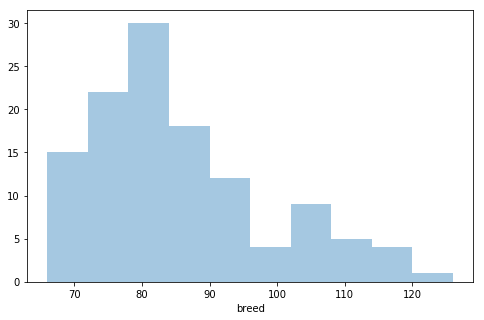

In [4]:
labels = pd.read_csv('../data/download/labels.csv')
labels = labels['breed'].value_counts().reset_index()
plt.figure(figsize=(8,5))
sns.distplot(labels['breed'], kde=False)
plt.show()

In [5]:
train_files = glob.iglob('../data/train/**/*.jpg', recursive=True)
valid_files = glob.iglob('../data/valid/**/*.jpg', recursive=True)
test_files  = glob.iglob('../data/test/test/*.jpg')
print('train data has {} files.'.format(len(list(train_files))))
print('valid data has {} files.'.format(len(list(valid_files))))
print('test data has {} files.'.format(len(list(test_files))))

train data has 9199 files.
valid data has 1023 files.
test data has 10357 files.


In [6]:
train_files = list(glob.iglob('../data/train/**/*.jpg', recursive=True))
valid_files = list(glob.iglob('../data/valid/**/*.jpg', recursive=True))
train_class = {x.split('/')[-2] for x in train_files}
valid_class = {x.split('/')[-2] for x in valid_files}
print('train data has {} classes.'.format(len(list(train_class))))
print('valid data has {} classes.'.format(len(list(valid_class))))

train data has 120 classes.
valid data has 120 classes.
